In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection and Integration

In [2]:
df1 = pd.read_csv(r"/content/heart1.csv")
df2 = pd.read_csv(r"/content/heart2.csv")

In [3]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The feature caa and thall are present in df2 but not in df1 so we are removing this two features

In [7]:
df2 = df2.drop(columns=['caa', 'thall'])

Renaming the column name of df2 to match df1

In [8]:
df2.columns = ("Age", "Sex", "ChestPainType", "RestingBP",
               "Cholesterol", "FastingBS", "RestingECG", "MaxHR",
               "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDisease")

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    int64  
 2   ChestPainType   303 non-null    int64  
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    int64  
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    int64  
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    int64  
 11  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


Mapping the data types of df1 and df2

In [10]:
sex_map = {1: 'M', 0: 'F'}
chest_pain_map = {0: 'TA', 1: 'ATA', 2: 'NAP', 3: 'ASY'}
exercise_angina_map = {1: 'Y', 0: 'N'}
st_slope_map = {0: 'Up', 1: 'Flat', 2: 'Down'}
resting_ecg_map = {0: 'Normal', 1: 'ST', 2: 'LVH'}

In [11]:
df2['Sex'] = df2['Sex'].map(sex_map)
df2['ChestPainType'] = df2['ChestPainType'].map(chest_pain_map)
df2['ExerciseAngina'] = df2['ExerciseAngina'].map(exercise_angina_map)
df2['ST_Slope'] = df2['ST_Slope'].map(st_slope_map)
df2['RestingECG'] = df2['RestingECG'].map(resting_ecg_map)

In [12]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,M,ASY,145,233,1,Normal,150,N,2.3,Up,1
1,37,M,NAP,130,250,0,ST,187,N,3.5,Up,1
2,41,F,ATA,130,204,0,Normal,172,N,1.4,Down,1
3,56,M,ATA,120,236,0,ST,178,N,0.8,Down,1
4,57,F,TA,120,354,0,ST,163,Y,0.6,Down,1


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    object 
 2   ChestPainType   303 non-null    object 
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    object 
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    object 
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    object 
 11  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 28.5+ KB


Integrating both df1 and df2 into single data set df using concat function

In [14]:
df = pd.concat([df1, df2], ignore_index=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1221 non-null   int64  
 1   Sex             1221 non-null   object 
 2   ChestPainType   1221 non-null   object 
 3   RestingBP       1221 non-null   int64  
 4   Cholesterol     1221 non-null   int64  
 5   FastingBS       1221 non-null   int64  
 6   RestingECG      1221 non-null   object 
 7   MaxHR           1221 non-null   int64  
 8   ExerciseAngina  1221 non-null   object 
 9   Oldpeak         1221 non-null   float64
 10  ST_Slope        1221 non-null   object 
 11  HeartDisease    1221 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 114.6+ KB


In [16]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,57,F,TA,140,241,0,ST,123,Y,0.2,Flat,0
1217,45,M,ASY,110,264,0,ST,132,N,1.2,Flat,0
1218,68,M,TA,144,193,1,ST,141,N,3.4,Flat,0
1219,57,M,TA,130,131,0,ST,115,Y,1.2,Flat,0


In [17]:
df.to_csv(r'combined.csv')

## Understanding the Dataset

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [21]:
df.shape

(1221, 12)

In [22]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1221 non-null   int64  
 1   Sex             1221 non-null   object 
 2   ChestPainType   1221 non-null   object 
 3   RestingBP       1221 non-null   int64  
 4   Cholesterol     1221 non-null   int64  
 5   FastingBS       1221 non-null   int64  
 6   RestingECG      1221 non-null   object 
 7   MaxHR           1221 non-null   int64  
 8   ExerciseAngina  1221 non-null   object 
 9   Oldpeak         1221 non-null   float64
 10  ST_Slope        1221 non-null   object 
 11  HeartDisease    1221 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 114.6+ KB


In [24]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1221.000000,1221.00000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,53.723178,132.20475,210.578215,0.212121,139.995086,0.925143,0.551188
std,9.350481,18.27277,100.394018,0.408978,25.453461,1.092282,0.497577
min,28.000000,0.00000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.00000,188.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.00000,228.000000,0.000000,141.000000,0.600000,1.000000
75%,60.000000,140.00000,269.000000,0.000000,160.000000,1.600000,1.000000
max,77.000000,200.00000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Cleaning and Preprocessing

Handling Null Values

In [28]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


No null values present in the dataset

Handling Duplicates

In [31]:
df.duplicated().sum()

1

In [33]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

Finding Outliers

<Axes: >

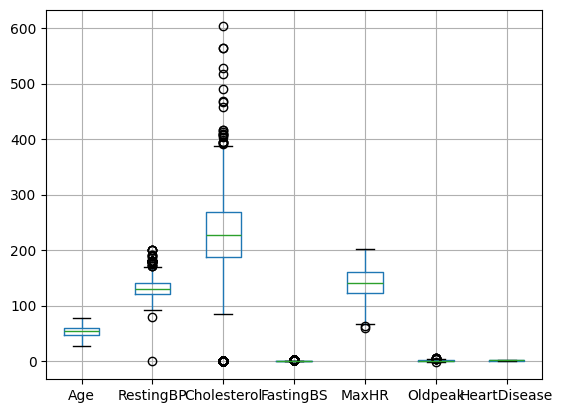

In [35]:
df.boxplot()

In [36]:
outlier_columns = []
outlier_dict = {}

In [37]:
from pandas.api.types import is_numeric_dtype

In [38]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lb=Q1-1.5*IQR
        up=Q3+1.5*IQR

        outlier = df[ (df[column]<lb) | (df[column]>up) ]

        if not outlier.empty:
            outlier_columns.append(column)
            c = outlier[column].count()
            outlier_dict[column] = c

In [39]:
outlier_columns

['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [40]:
for col in outlier_columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values in column 'RestingBP':
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
--------------------
Unique values in column 'Cholesterol':
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 298 256 117 295 173 315 281 309 200
 336 355 326 171 491 271 274 394 221 126 305 2

In [41]:
outlier_columns.remove('FastingBS')
outlier_dict.pop('FastingBS')

259

In [42]:
outlier_dict

{'RestingBP': 37, 'Cholesterol': 194, 'MaxHR': 2, 'Oldpeak': 12}

Removing Outliers

In [43]:
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR

    if outlier_dict[column] > 100:
        df[column] = np.where(df[column] < lb, lb, df[column])
        df[column] = np.where(df[column] > up, up, df[column])
    else:
        df = df[~((df[column] < lb) | (df[column] > up))]

<ipython-input-43-0f3279fd5953>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] < lb, lb, df[column])
<ipython-input-43-0f3279fd5953>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > up, up, df[column])


<Axes: >

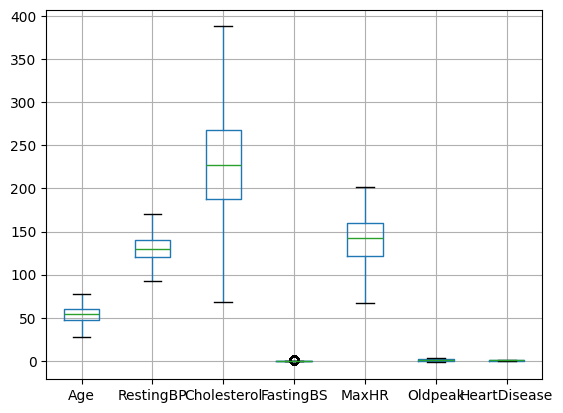

In [45]:
df.boxplot()

## **Exploratory Data Analysis**

In [46]:
import matplotlib.pyplot as plt

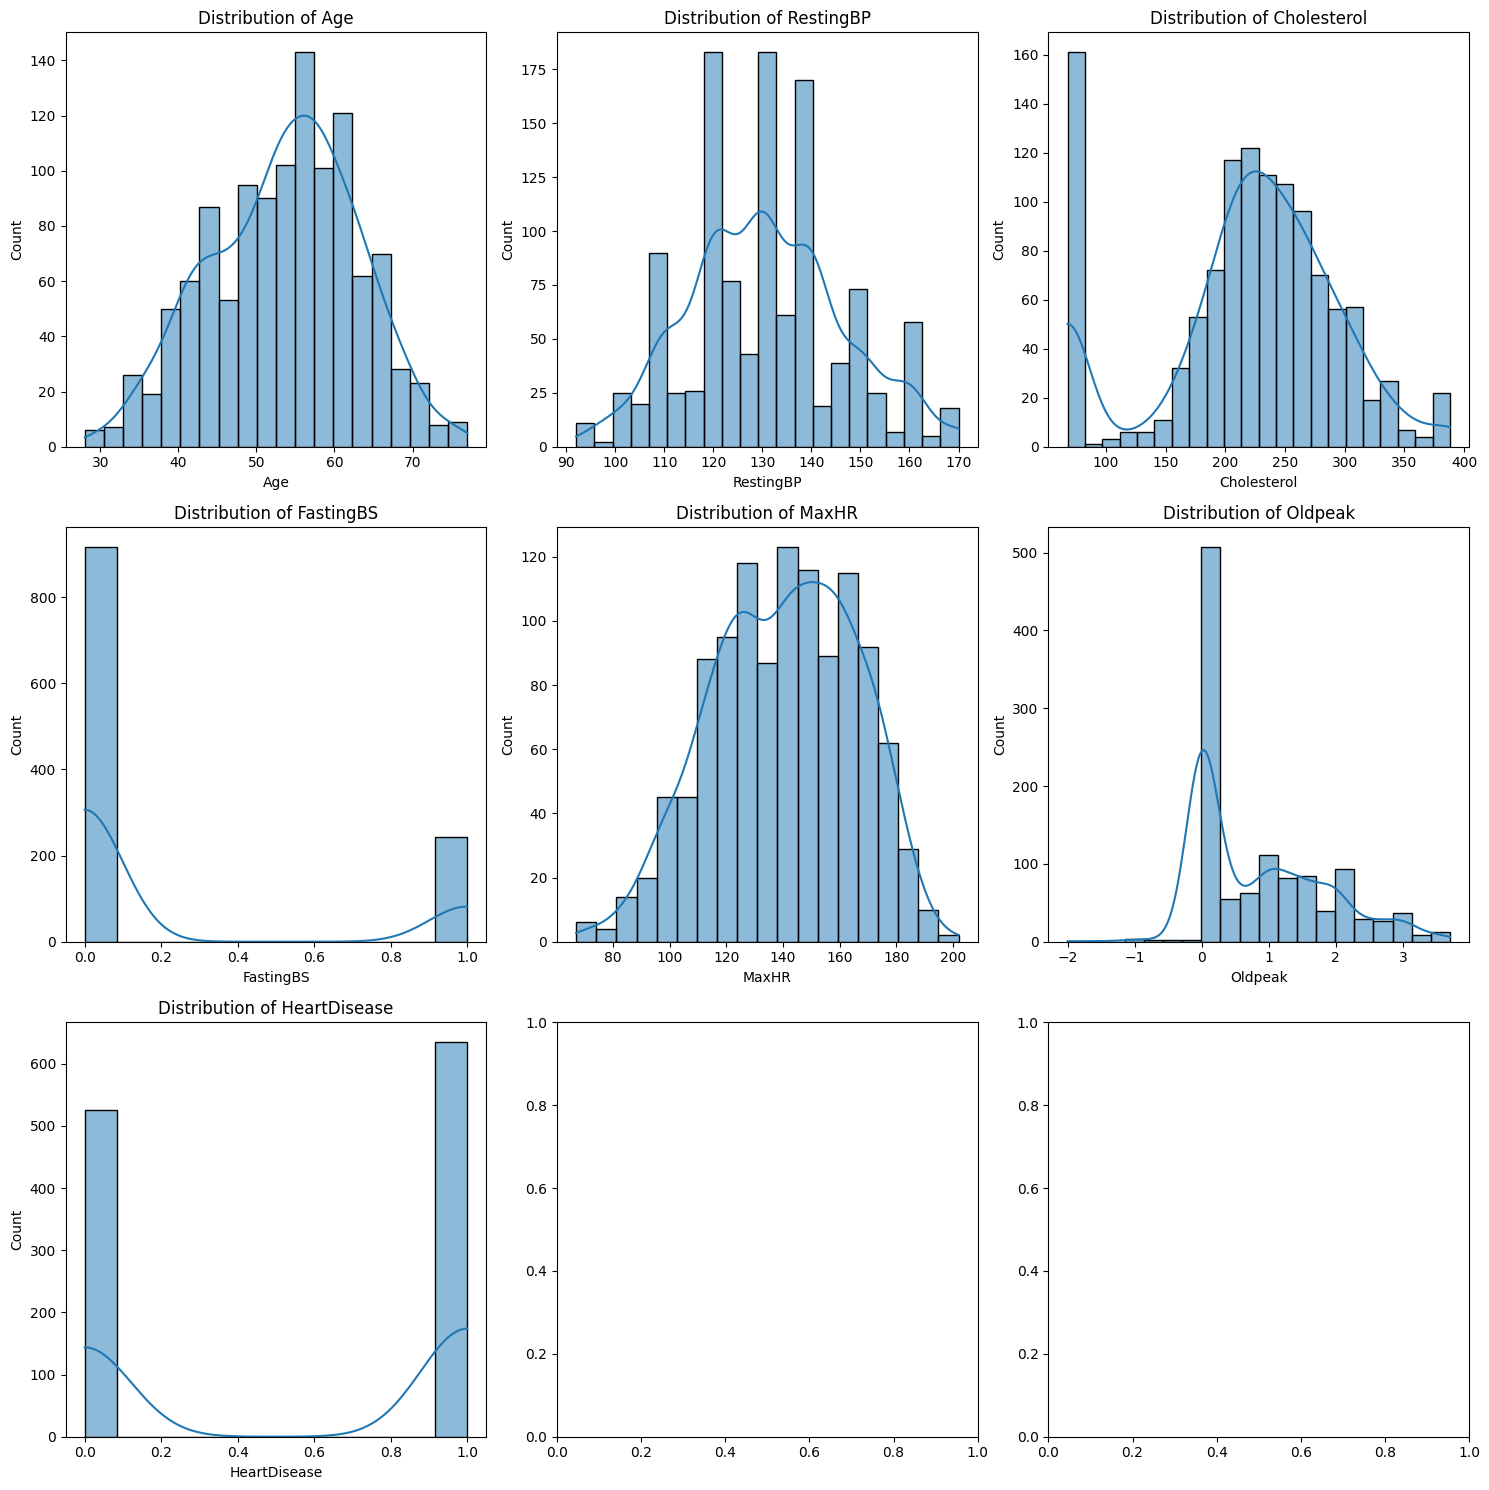

In [47]:
def plot_numeric_distributions(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(numeric_cols)
    num_rows = (num_plots + 2) // 3  # Adjust number of rows based on features
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.ravel()  # Flatten axes array

    for i, col in enumerate(numeric_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
plot_numeric_distributions(df)

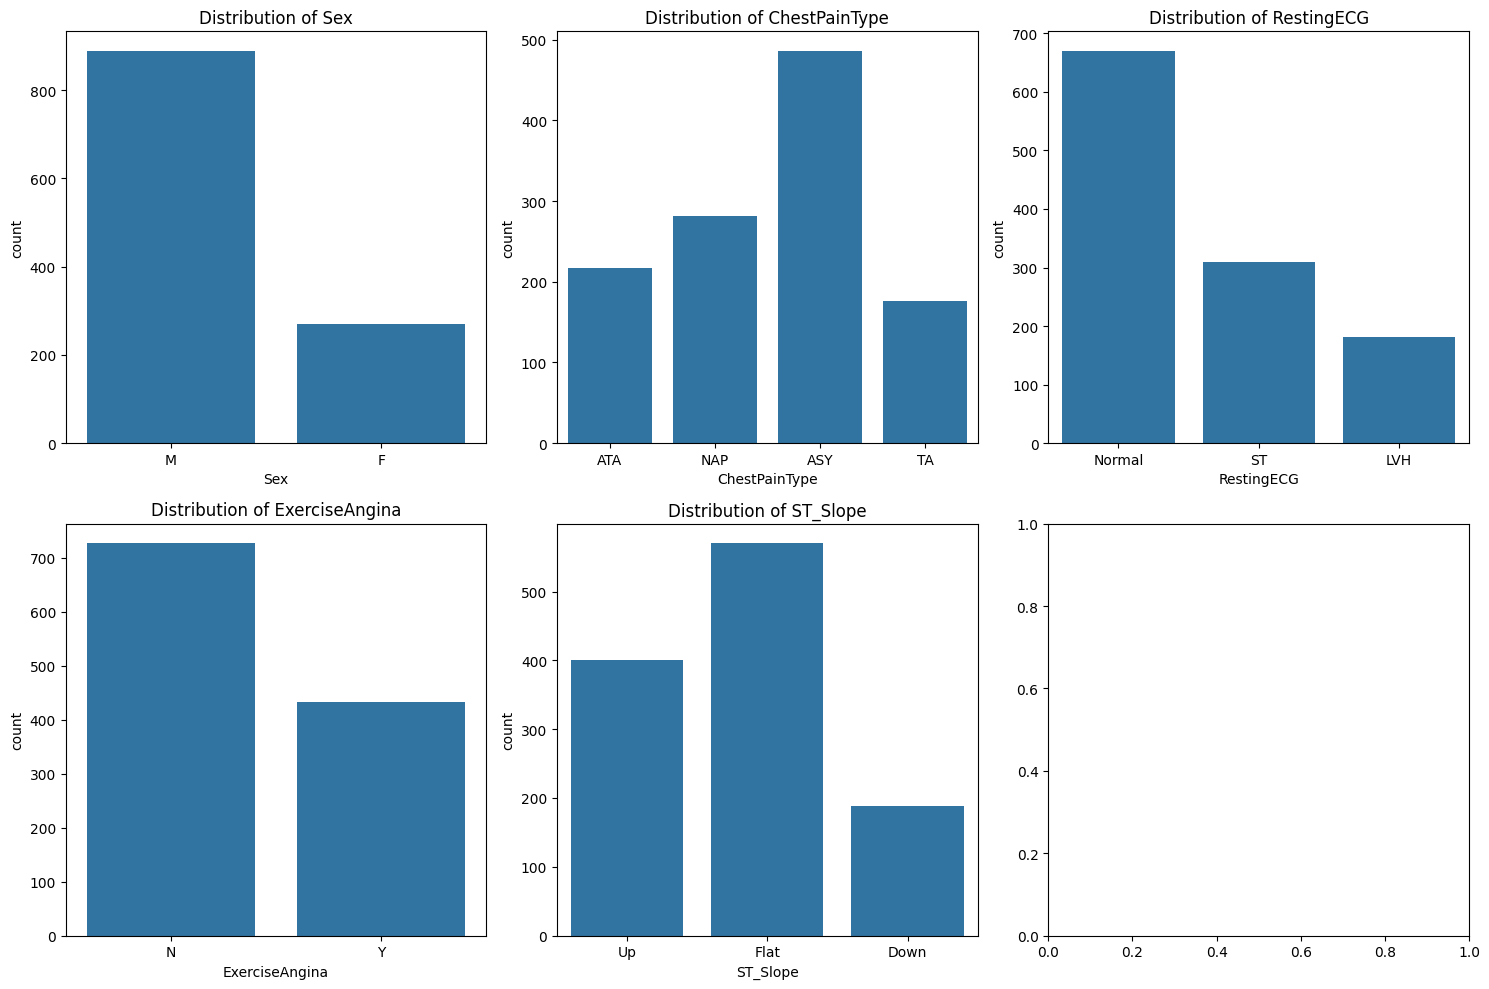

In [48]:
def plot_categorical_distributions(df):
  categorical_cols = df.select_dtypes(include=['object', 'category']).columns
  num_plots = len(categorical_cols)
  num_rows = (num_plots + 2) // 3
  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  axes = axes.ravel()

  for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()
plot_categorical_distributions(df)

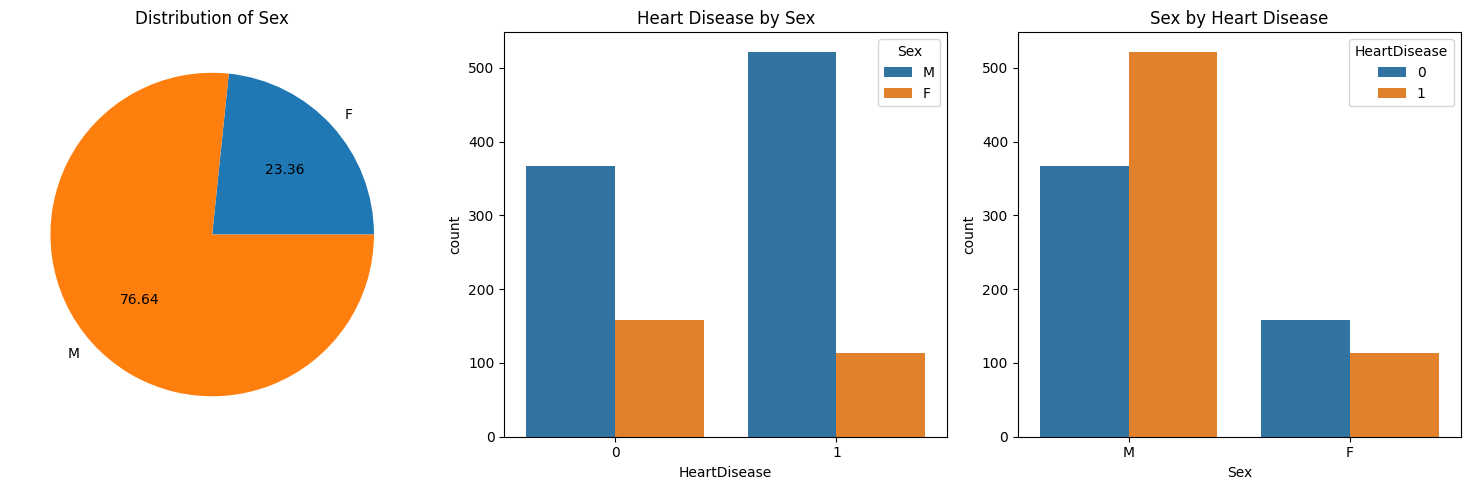

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df.groupby(by="Sex").size().plot(kind="pie", autopct="%.2f", ax=axes[0])
axes[0].set_title('Distribution of Sex')

sns.countplot(x='HeartDisease', hue='Sex', data=df, ax=axes[1])
axes[1].set_title('Heart Disease by Sex')

sns.countplot(hue='HeartDisease', x='Sex', data=df, ax=axes[2])
axes[2].set_title('Sex by Heart Disease')

plt.tight_layout()
plt.show()

From this Countplot we can conclude that the sex male has a higher chance of having a heart disease than female

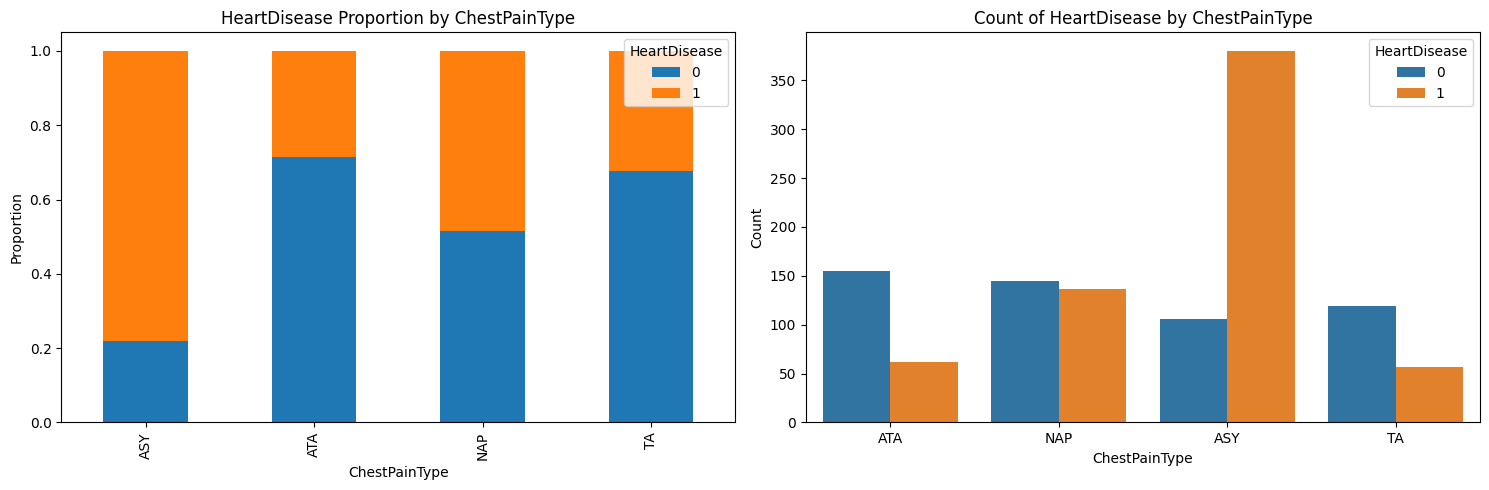

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

grouped = df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('HeartDisease Proportion by ChestPainType')
axes[0].set_xlabel('ChestPainType')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='HeartDisease')

sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=axes[1])
axes[1].set_title('Count of HeartDisease by ChestPainType')
axes[1].set_xlabel('ChestPainType')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

From this plot we can conclude that the patient having the chest pain type ASY tend to have heart disease more than other chest pain types

<Axes: xlabel='ST_Slope', ylabel='count'>

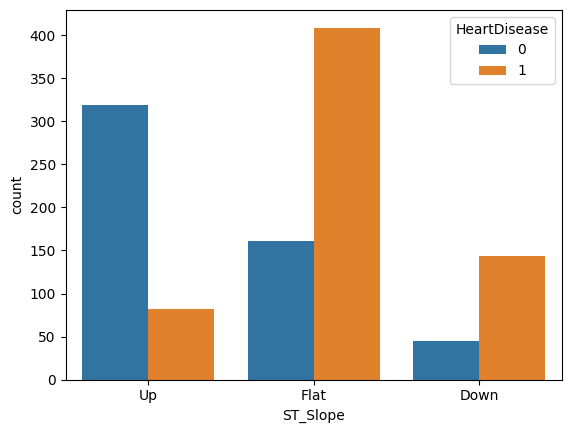

In [52]:
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)

From the above figure we can conclude that the patients having ST_Slope value up have lower chance of having a heart disease

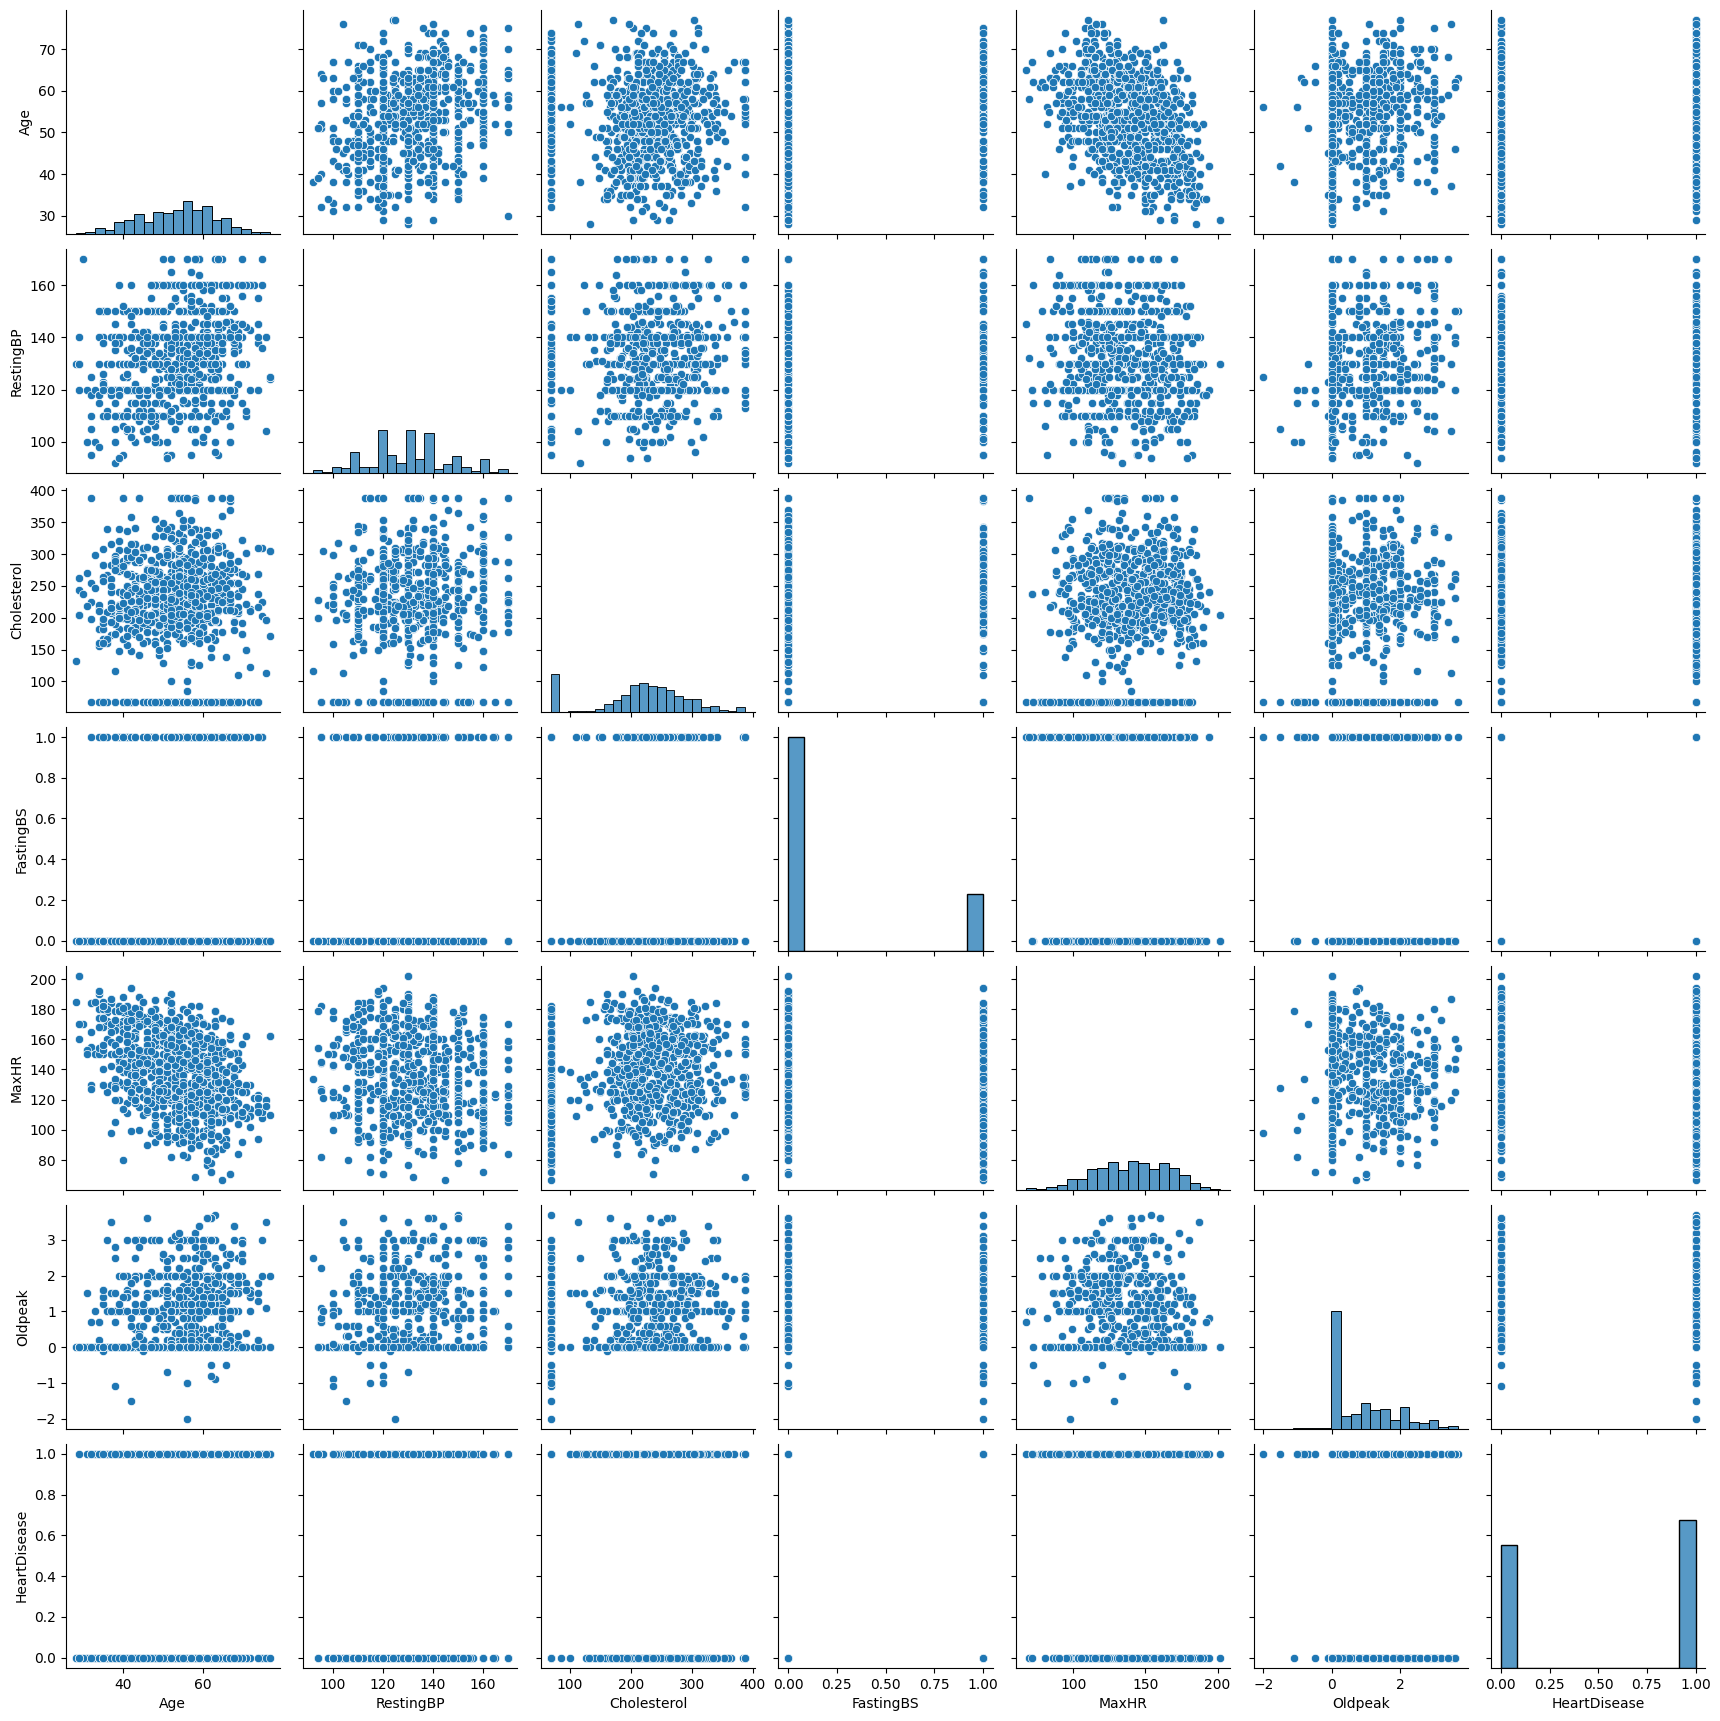

In [74]:
sns.pairplot(df)

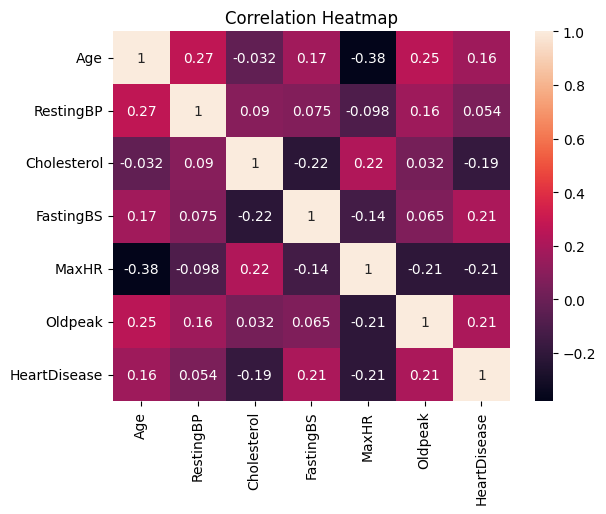

In [108]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

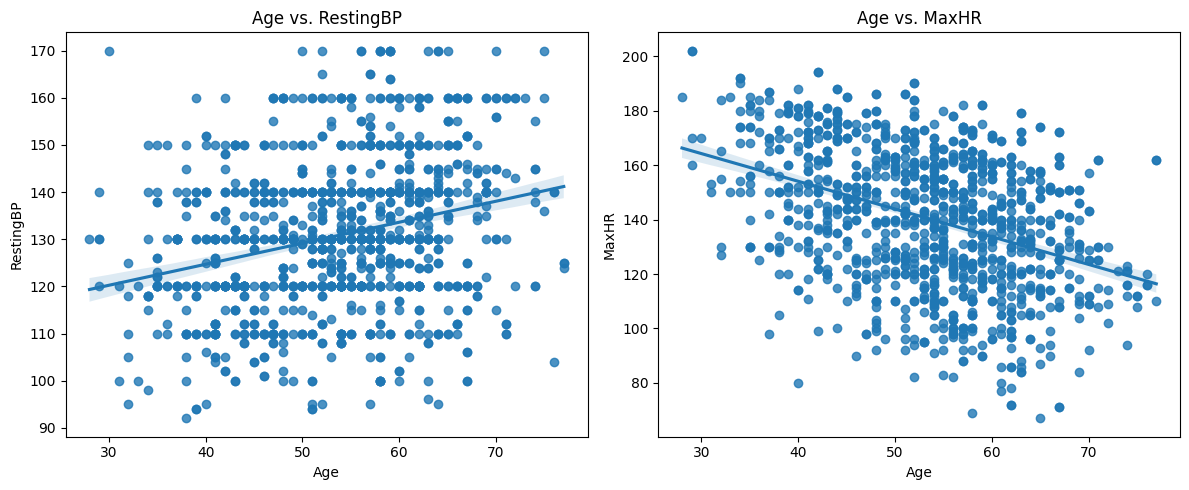

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age vs. RestingBP
sns.regplot(x='Age', y='RestingBP', data=df, ax=axes[0])
axes[0].set_title('Age vs. RestingBP')

# Age vs. MaxHR
sns.regplot(x='Age', y='MaxHR', data=df, ax=axes[1])
axes[1].set_title('Age vs. MaxHR')


plt.tight_layout()
plt.show()

From this we can conclude that the features
*   age and maxhr are inversely propotional
*   age and RestingBp are inversely propotional




<Axes: xlabel='Age', ylabel='count'>

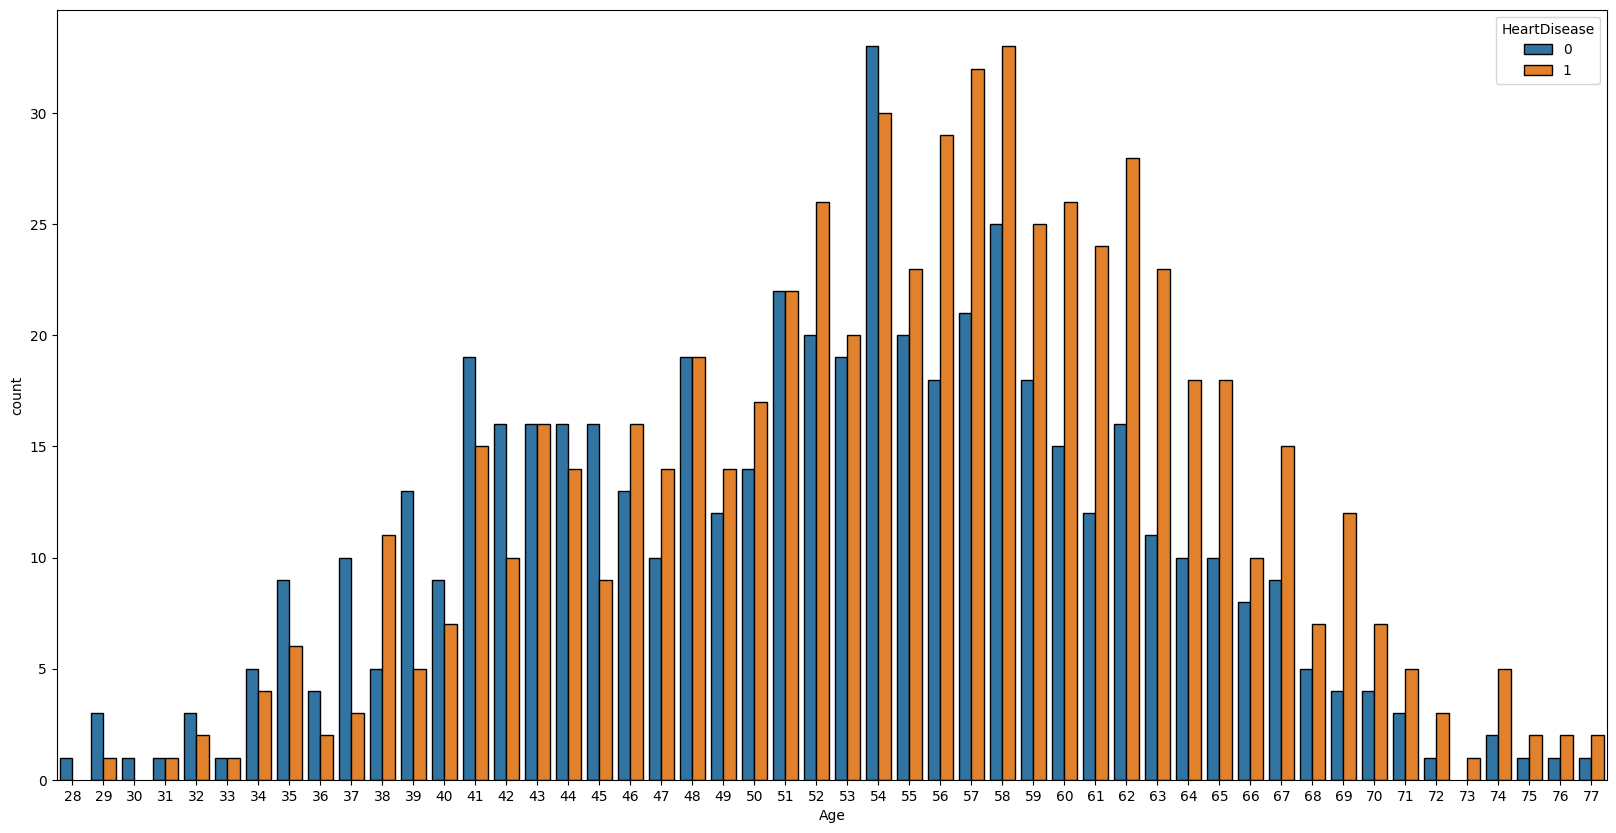

In [95]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Age"],data = df,hue = "HeartDisease", edgecolor = 'black')

In [85]:
age_un = df['Age'].unique()
age_un.sort()  # Sort in-place
print(age_un) # To view the sorted unique ages

[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]


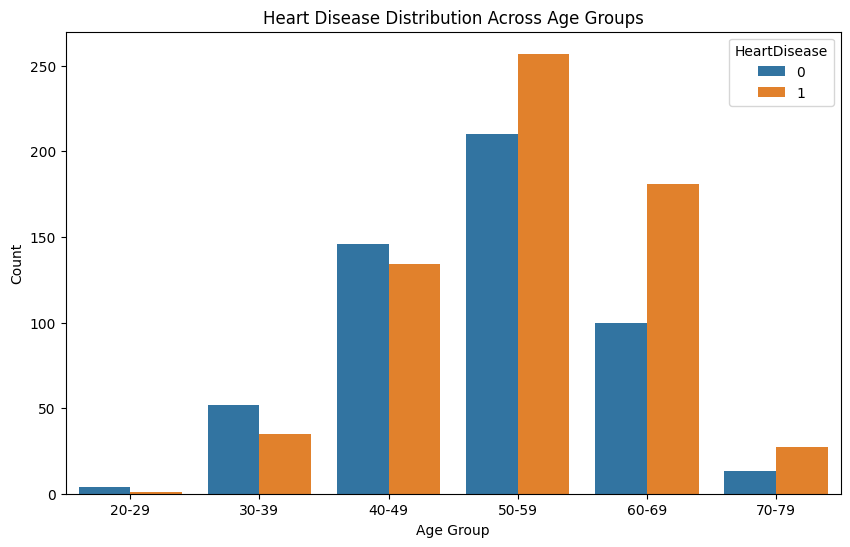

In [91]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', ]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='HeartDisease', data=df)
plt.title('Heart Disease Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## Data Transformation

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = pd.DataFrame(le.fit_transform(df["Sex"]))
df["ChestPainType"] = pd.DataFrame(le.fit_transform(df["ChestPainType"]))
df["ExerciseAngina"] = pd.DataFrame(le.fit_transform(df["ExerciseAngina"]))
df["ST_Slope"] = pd.DataFrame(le.fit_transform(df["ST_Slope"]))
df["RestingECG"] = pd.DataFrame(le.fit_transform(df["RestingECG"]))


In [117]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Group
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0,40-49
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1,40-49
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0,30-39
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1,40-49
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,57,0,3,140,241.0,0,2,123,1,0.2,1,0,50-59
1156,45,1,0,110,264.0,0,2,132,0,1.2,1,0,40-49
1157,68,1,3,144,193.0,1,2,141,0,3.4,1,0,60-69
1158,57,1,3,130,131.0,0,2,115,1,1.2,1,0,50-59


In [118]:
df =df.reset_index()

In [119]:
df_r = df

In [127]:
df

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Group
0,0,40,1,1,140,289.0,0,1,172,0,0.0,2,0,40-49
1,1,49,0,2,160,180.0,0,1,156,0,1.0,1,1,40-49
2,2,37,1,1,130,283.0,0,2,98,0,0.0,2,0,30-39
3,3,48,0,0,138,214.0,0,1,108,1,1.5,1,1,40-49
4,4,54,1,2,150,195.0,0,1,122,0,0.0,2,0,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,1155,57,0,3,140,241.0,0,2,123,1,0.2,1,0,50-59
1156,1156,45,1,0,110,264.0,0,2,132,0,1.2,1,0,40-49
1157,1157,68,1,3,144,193.0,1,2,141,0,3.4,1,0,60-69
1158,1158,57,1,3,130,131.0,0,2,115,1,1.2,1,0,50-59


In [128]:
df.drop(columns=['index','Age_Group'],inplace=True)

In [120]:
df["Sex"].unique()

array([1, 0])

In [121]:
df["Sex"].dropna()

,Sex
0,1
1,0
2,1
3,0
4,1
...,...
1155,0
1156,1
1157,1
1158,1


## Model Selection and Evaluation

In [138]:
features = df[df.columns.drop(['HeartDisease'])].values
target = df['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [157]:
def model_run(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(model, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

In [154]:
def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Logistic Regression Evaluation:
Accuracy :  81.03%
Cross Validation Score :  85.70%
ROC_AUC Score :  80.80%


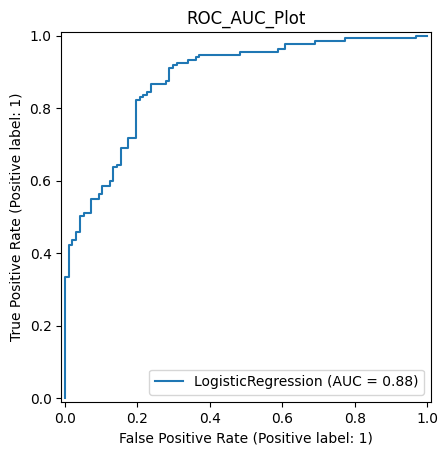

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        97
           1       0.85      0.82      0.83       135

    accuracy                           0.81       232
   macro avg       0.80      0.81      0.81       232
weighted avg       0.81      0.81      0.81       232



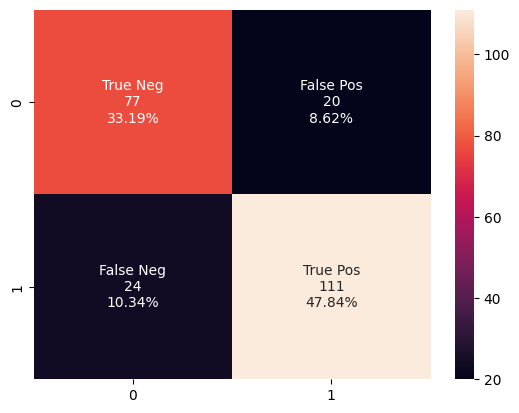

In [158]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1200)
print("Logistic Regression Evaluation:")
model_run(log_reg)
model_evaluation(log_reg)

Accuracy :  80.60%
Cross Validation Score :  87.09%
ROC_AUC Score :  80.14%


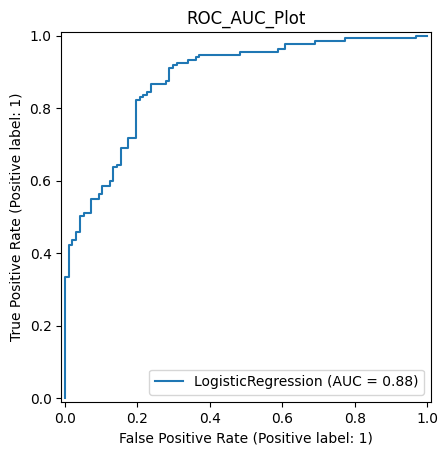

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        97
           1       0.84      0.83      0.83       135

    accuracy                           0.81       232
   macro avg       0.80      0.80      0.80       232
weighted avg       0.81      0.81      0.81       232



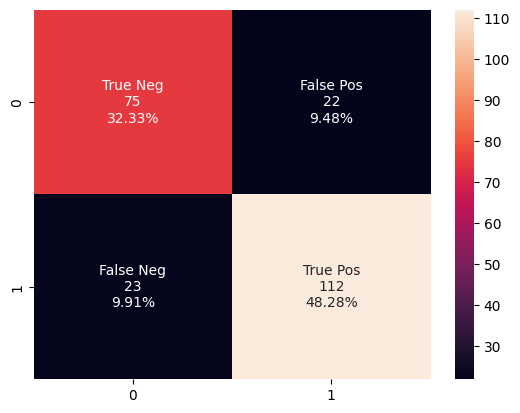

In [159]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier()
model_run(classifier_rf)
model_evaluation(classifier_rf)

Accuracy :  77.59%
Cross Validation Score :  72.55%
ROC_AUC Score :  78.13%


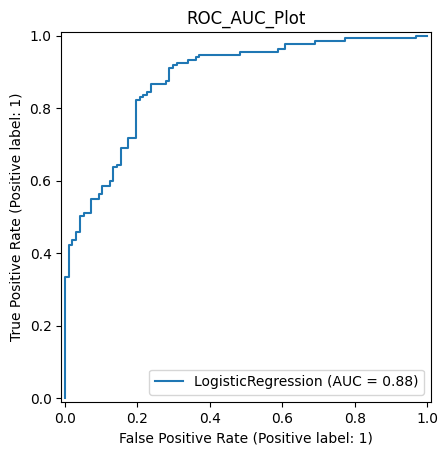

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        97
           1       0.85      0.75      0.80       135

    accuracy                           0.78       232
   macro avg       0.77      0.78      0.77       232
weighted avg       0.79      0.78      0.78       232



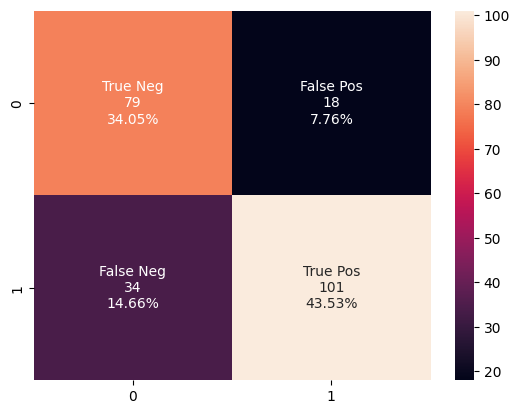

In [160]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()
model_run(classifier_dtc)
model_evaluation(classifier_dtc)


Support Vector Classifier Evaluation:
Accuracy :  65.09%
Cross Validation Score :  65.71%
ROC_AUC Score :  65.36%


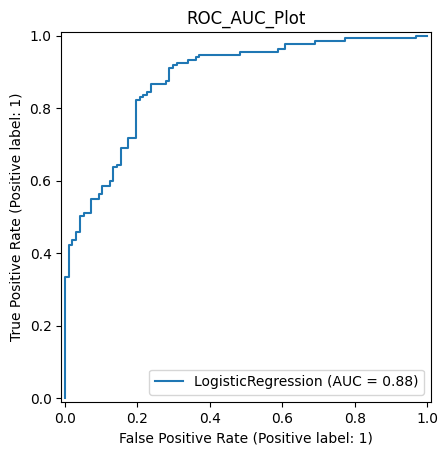

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        97
           1       0.73      0.64      0.68       135

    accuracy                           0.65       232
   macro avg       0.65      0.65      0.65       232
weighted avg       0.66      0.65      0.65       232



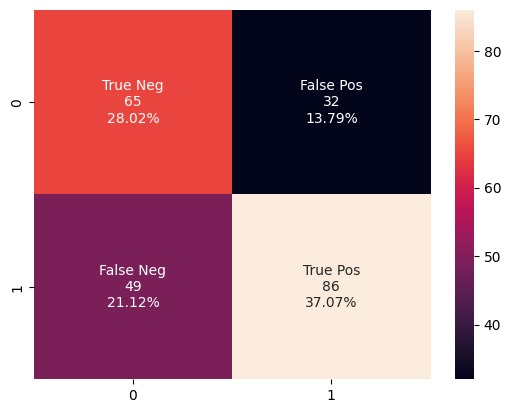

In [165]:
from sklearn.svm import SVC
svc = SVC(probability=True)
print("\nSupport Vector Classifier Evaluation:")
model_run(svc)
model_evaluation(svc)

In [170]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.8221447253705317
Test Accuracy: 0.8017241379310345


Accuracy :  81.90%
Cross Validation Score :  87.38%
ROC_AUC Score :  81.69%


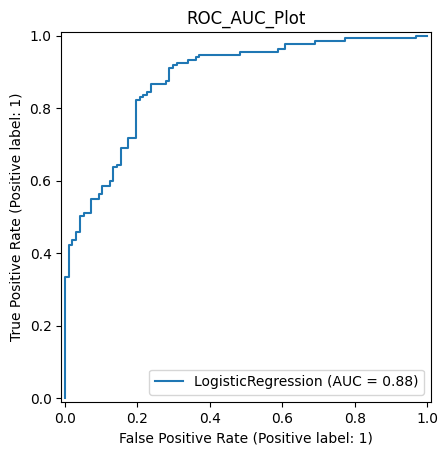

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        97
           1       0.85      0.83      0.84       135

    accuracy                           0.82       232
   macro avg       0.81      0.82      0.81       232
weighted avg       0.82      0.82      0.82       232



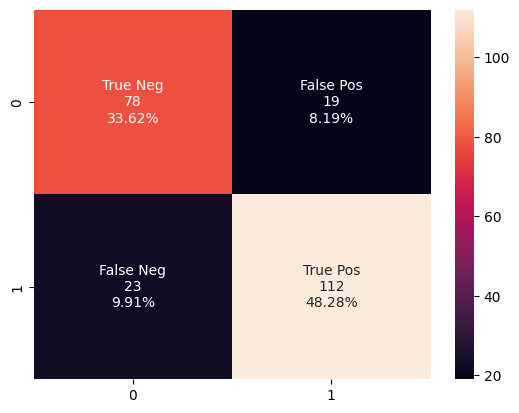

In [174]:
classifier_rf = RandomForestClassifier(bootstrap=False,min_samples_leaf=2,min_samples_split=2,max_depth=20,n_estimators=200)
model_run(classifier_rf)
model_evaluation(classifier_rf)